# 准指数检验

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: 输入原始数据
original_data = np.array([3.8, 4.4, 4.7, 4.9, 5.5, 6.2, 7.3, 7.6, 8.2, 9.1])
n = len(original_data)

# Step 2: 计算一次累加值
accumulated_data = np.cumsum(original_data)
print("Accumulated data:", accumulated_data)

# Step 3: 计算级比 λ(k)
# level_ratio = accumulated_data[1:] / accumulated_data[:-1]  # k = 2, 3, ..., n
# print("Level ratio λ(k):", level_ratio)

# Step 4: 计算 σ(k)
sigma_k = original_data[1:]  / accumulated_data[:-1] +1 # k = 2, 3, ..., n
print("Sigma_k σ(k):", sigma_k)

# Step 5: 计算 p(k) 值
p_k = original_data[1:]  / accumulated_data[:-1] 
print("p(k) values:", p_k)

# Step 6: 检查 p(k) 是否在 (0, 0.5) 范围内
if np.all((p_k > 0) & (p_k < 0.5)):
    print("The data passes the quasi-exponential law test with p(k) in (0, 0.5).")
else:
    print("Warning: p(k) values are not all within the range (0, 0.5).")

# 输出 p(k) 值
for i, pk in enumerate(p_k, start=2):
    print(f"p({i}) = {pk:.4f}")


Accumulated data: [ 3.8  8.2 12.9 17.8 23.3 29.5 36.8 44.4 52.6 61.7]
Sigma_k σ(k): [2.15789474 1.57317073 1.37984496 1.30898876 1.26609442 1.24745763
 1.20652174 1.18468468 1.1730038 ]
p(k) values: [1.15789474 0.57317073 0.37984496 0.30898876 0.26609442 0.24745763
 0.20652174 0.18468468 0.1730038 ]
p(2) = 1.1579
p(3) = 0.5732
p(4) = 0.3798
p(5) = 0.3090
p(6) = 0.2661
p(7) = 0.2475
p(8) = 0.2065
p(9) = 0.1847
p(10) = 0.1730


# 构造微分模型，求解参数

In [6]:
# 创建均值生成序列
mean_accumulated = 0.5 * (accumulated_data[:-1] + accumulated_data[1:])
B = np.vstack((-mean_accumulated, np.ones(n-1))).T
Y = original_data[1:]

# 求解微分方程的参数
u = np.linalg.inv(B.T @ B) @ B.T @ Y
a, b = u[0], u[1]
print("Model parameters: a =", a, "b =", b)
# 给出回归方程
print(f"The regression equation is: x^(1)(k) = ({original_data[0]:.4f} - {b/a:.4f}) * exp({-a:.4f} * (k-1)) + {b/a:.4f}")

# 构造灰色预测模型的解
def grey_model_prediction(a, b, x0, k):
    return (x0[0] - b/a) * np.exp(-a * k) + b/a

fitted_values = np.array([grey_model_prediction(a, b, original_data, i) for i in range(n)])
predicted_data = np.array([fitted_values[0]] + [fitted_values[i] - fitted_values[i-1] for i in range(1, n)])




Model parameters: a = -0.09555094784587057 b = 3.691551968755992
The regression equation is: x^(1)(k) = (3.8000 - -38.6344) * exp(0.0956 * (k-1)) + -38.6344


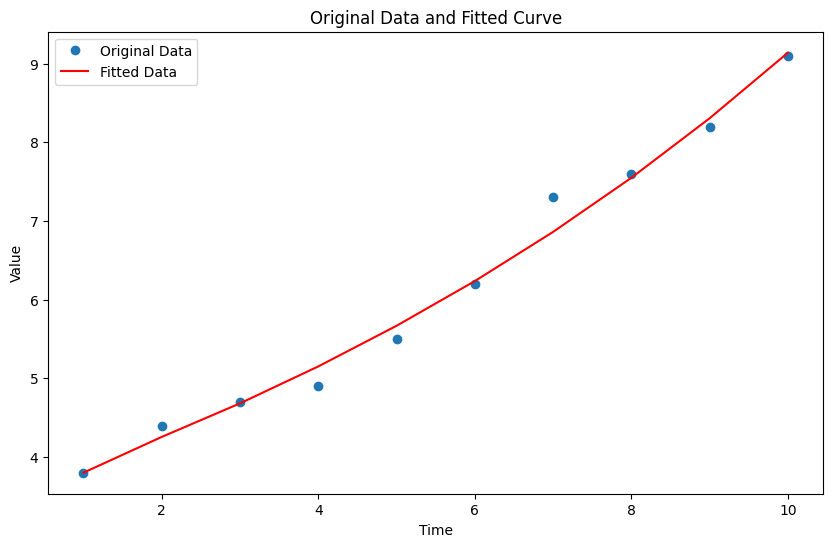

In [5]:

# 绘制拟合曲线
time_series = np.arange(1, n + 1)
plt.figure(figsize=(10, 6))
plt.plot(time_series, original_data, 'o', label='Original Data')
plt.plot(time_series, predicted_data, 'r-', label='Fitted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data and Fitted Curve')
plt.legend()
plt.show()

# 模型检验

Absolute Residuals: [ 2.66453526e-15  1.45321763e-01  1.87269741e-02 -2.50640289e-01
 -1.67068602e-01 -3.52765373e-02  4.39544229e-01  5.16814771e-02
 -1.05149749e-01 -3.78645650e-02]
Relative Residuals: [ 7.01193489e-16  3.30276734e-02  3.98446257e-03 -5.11510794e-02
 -3.03761095e-02 -5.68976409e-03  6.02115383e-02  6.80019435e-03
 -1.28231401e-02 -4.16094121e-03]
Average Relative Residual: 0.020822490291531808
The model is not very good.


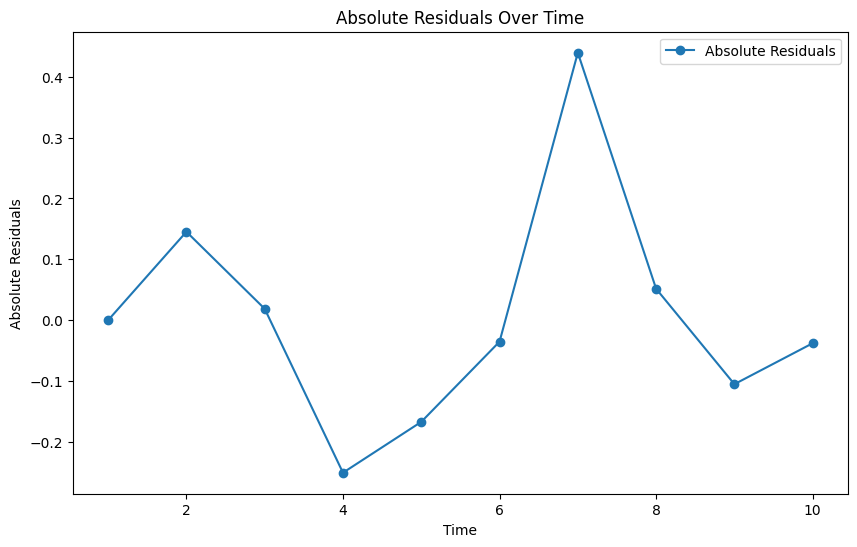

In [10]:
# 残差检验
absolute_residuals = original_data - predicted_data
relative_residuals = absolute_residuals / original_data
average_relative_residual = np.mean(np.abs(relative_residuals))

print("Absolute Residuals:", absolute_residuals)
print("Relative Residuals:", relative_residuals)
print("Average Relative Residual:", average_relative_residual)

if average_relative_residual < 0.01:
    print("The model is perfect.")
elif average_relative_residual < 0.02:
    print("The model is not good.")
else:
    print("The model is not very good.")
# 绘制绝对残差图
plt.figure(figsize=(10, 6))
plt.plot(time_series, absolute_residuals, 'o-', label='Absolute Residuals')
plt.xlabel('Time')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals Over Time')
plt.legend()
plt.show()

In [11]:
# 极比偏差检验
level_ratio = accumulated_data[1:] / accumulated_data[:-1]
level_ratio_predicted = predicted_data[1:] / original_data[:-1]
level_ratio_deviation = np.abs(level_ratio_predicted - level_ratio) / level_ratio
print("Level ratio deviation:", level_ratio_deviation)

# 级比偏差检验标准
acceptable_deviation_02 = level_ratio_deviation < 0.2
acceptable_deviation_01 = level_ratio_deviation < 0.1

if np.all(acceptable_deviation_02):
    print("The level ratio deviation is within 0.2 threshold for all data points.")
else:
    print("Warning: The level ratio deviation exceeds the 0.2 threshold for some data points.")

if np.all(acceptable_deviation_01):
    print("The level ratio deviation is within 0.1 threshold for all data points.")
else:
    print("Warning: The level ratio deviation exceeds the 0.1 threshold for some data points.")

Level ratio deviation: [0.4811368  0.32370615 0.20579417 0.11645948 0.1045797  0.11297578
 0.14297753 0.07757492 0.04998285]
